# Logistic Regression
I'm using some data I found in geeksforgeeks

In [ ]:
#Install any packages you need
! pip install pandas
! pip install matplotlib
! pip install statsmodels
! pip install numpy

Format and setup the data for easier manipulation

In [2]:
import pandas as pd

data = pd.read_csv('Data.csv')
#These are the values most likely to change
independents = ['gmat', 'gpa', 'work experience']
dependent = 'admitted'

for i in data.columns:
    data[i] = pd.to_numeric(data[i], errors='coerce')
data = data.dropna()
data.head()

,gmat,gpa,work experience,admitted
0,580,2.7,4,0
1,660,3.3,6,1
2,740,3.3,5,1
3,590,1.7,4,0
4,660,4.0,4,1


Plotting the distribution for the first independent variable just for visualisation

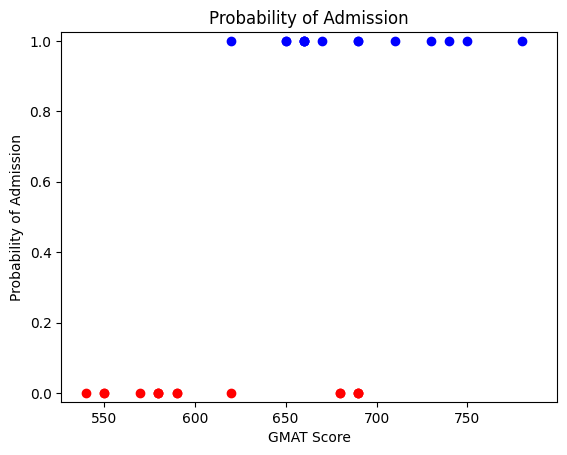

In [3]:
from matplotlib import pyplot as plt

def plotting(x):
    #These are the values most likely to change
    plt.title("Probability of Admission")
    plt.xlabel("GMAT Score")
    plt.ylabel("Probability of Admission")

    plt.xlim(min(x)*0.975, max(x)*1.025)
    plt.ylim(-0.025, 1.025)

def testingScatters(testingIndependent):
    dependentFalse = data[data[dependent] == 0]
    dependentTrue = data[data[dependent] == 1]

    plt.scatter(dependentFalse[testingIndependent], dependentFalse[dependent], color="red")
    plt.scatter(dependentTrue[testingIndependent], dependentTrue[dependent], color="blue")

testingScatters(independents[0])
plotting(data[independents[0]])

Generating two models, one for all the independents and the other for visualisation

In [69]:
from sklearn.linear_model import LogisticRegression as lr

testingModel = lr().fit(data[[independents[0]]], data[dependent])

model = lr().fit(data[independents], data[dependent])
print(f"Accuracy: {(model.score(data[independents], data[dependent])) * 100:.2f}%")

Accuracy: 86.67%


Plotting the model towards first independent variable for visualisation

c:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


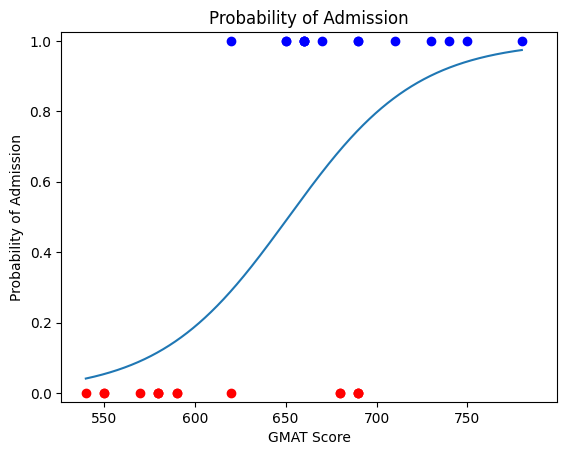

In [56]:
import numpy as np

visualisationValues = np.arange(min(data[independents[0]]), max(data[independents[0]]), 0.01)
prediction = [i[1] for i in testingModel.predict_proba([[x] for x in visualisationValues])]

plt.plot(visualisationValues, prediction)

testingScatters(independents[0])
plotting(data[independents[0]])

Creating a table for our custom inputs

In [66]:
#These are the values most likely to change
predictionValues = [[700, 3, 3],
                    [600, 3, 5]]

predictionFrame = pd.DataFrame()
for i, v in enumerate(predictionValues[0]):
    predictionFrame[independents[i]] = [x[i] for x in predictionValues]

prediction = [i[1] for i in model.predict_proba(predictionValues)]
predictionFrame[f"Predicted {dependent} probability"] = prediction

predictionFrame

c:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,gmat,gpa,work experience,Predicted admitted probability
0,650,3.7,4,0.627483
1,600,3.0,5,0.479346
